In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

def k_means(X, k, D=1e-5):
    """
    X数据，k为聚类数量，D为阈值
    """
    #数据数量
    n = X.shape[0]
    #聚类标签
    clusters = np.zeros(n, dtype=int)
    #初始中心点
    index = np.random.randint(0, n, k)
    centroids = X[index]
    #记录上一轮迭代的聚类中心
    centroids_pre = np.copy(centroids)
    
    while True:
        #计算距离矩阵
        d1 = np.sum(X ** 2, axis=1).reshape(-1, 1)
        d2 = np.sum(centroids ** 2, axis=1).reshape(1, -1)
        dist = d1 + d2 - 2 * X.dot(centroids.T)
        #STEP1:找到最近的中心
        clusters = np.argmin(dist, axis=1)
        
        #STEP2:重新计算中心
        for i in range(k):
            index = X[clusters==i]
            #判断是否有点和某聚类中心在一类
            if len(index) != 0:
                centroids[i] = np.mean(index, axis=0)
        #计算误差
        delta = np.linalg.norm(centroids - centroids_pre)
        
        #判断是否超过阈值
        if delta < D:
            break

        centroids_pre = np.copy(centroids)
        
    return clusters, centroids

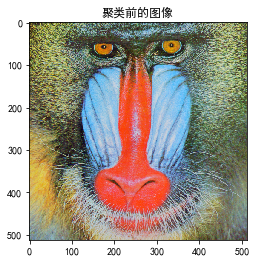

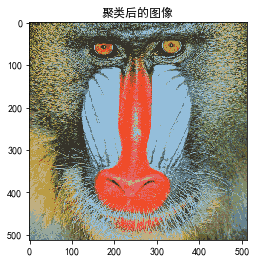

In [2]:
#读取图片并展示图片
A = imread('mandrill-large.tiff')
plt.imshow(A)
plt.title("聚类前的图像")
plt.show()

#将图片转化为矩阵
A_proceed = A.reshape(-1, 3)
#转换为浮点型，否则会报错
A_proceed = A_proceed.astype(np.float32)
#运行聚类
clusters, centroids = k_means(A_proceed, 16, 30)
#变成图片的形状
A_compressed = np.reshape(centroids[clusters], A.shape)
#转换为整型
A_compressed = A_compressed.astype(np.uint8)
#显示图像
plt.imshow(A_compressed)
plt.title("聚类后的图像")
plt.show()